# IBM Q Exercise 3: Measurement of two (entangled) qubits
### Written by Anna Liv Paludan Bjerregaard

In this exercise we will study *entanglement* which happens when measuring one qubit would influence the measurement on another! We start again by constructing a circuit.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
# Importing standard Qiskit libraries
from qiskit.providers import Options
from qiskit import QuantumCircuit, transpile, assemble
from qiskit_aer import AerSimulator
from qiskit_ibm_provider import IBMProvider

from qiskit.visualization import *
from ibm_quantum_widgets import *

# Use Statevector object to calculate the ideal output
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Qiskit Runtime
from qiskit_ibm_runtime import QiskitRuntimeService, Batch, Sampler

# Loading your IBM Q account(s)
provider = IBMProvider()

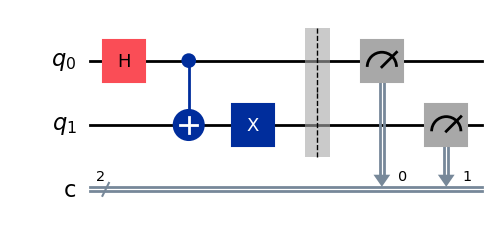

In [2]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Exercise:** Show that the qubits are in the state
$$\frac{1}{\sqrt{2}}\left(|01\rangle + |10\rangle\right)\:.$$
Is this an entangled state?

*Hint: The line between $q_0$ and $q_1$ is a CNOT operator (definition 13 in the notes)*

We've set up the circuit such that $q_0$ is measured before $q_1$. If the measurement of $q_0$ returns $0$, what will be the measurement of $q_1$?

In [11]:
N_measure = 1024

{'10': 533, '01': 491}


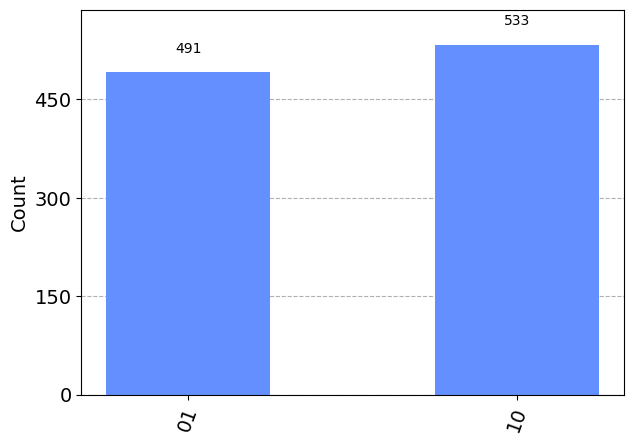

In [12]:
simulator = AerSimulator()
Nmeasure = N_measure #Amount of times the circuit is run
result = simulator.run(circuit, shots=Nmeasure).result() 
device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code

print(device_counts)
plot_histogram(device_counts)

**Exercise:** Explain the histogram above. Remember that IBM Q puts the result for $q_0$ to the right and $q_1$ to the left

Let's try a different circuit!

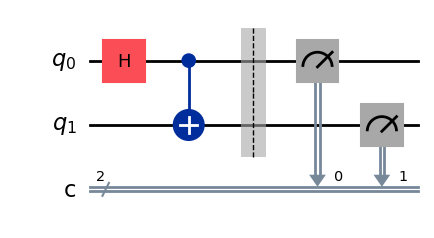

In [5]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

**Exercise:** What state are the qubits in before the measurement? Are they entangled?

In [6]:
N_measure = 1024

{'11': 495, '00': 529}


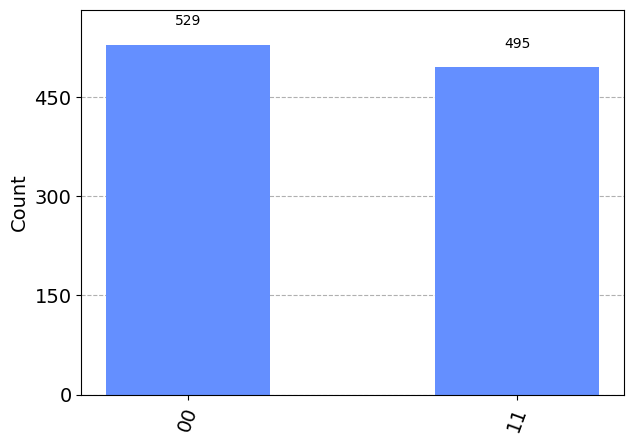

In [7]:
simulator = AerSimulator()
Nmeasure = N_measure #Amount of times the circuit is run
result = simulator.run(circuit, shots=Nmeasure).result() 
device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code

print(device_counts)
plot_histogram(device_counts)

**Exercise:** Explain the histogram from the state of the qubits.

Now that you've done measurements on entangled qubits, you have a solid foundation for learning how quantum computers are used to solve problems! We will build upon this in the nex exercise on Grover's algorithm.

**Bonus exercise:** We'll now construc a similar circuit to the first one in this exercise, apart from the fact that we put the qubits in the state
$$\frac{1}{\sqrt{2}}\left(|01\rangle-|10\rangle\right)$$
before the measurement is performed. Will this impact the result of the measurement? Why or why not?

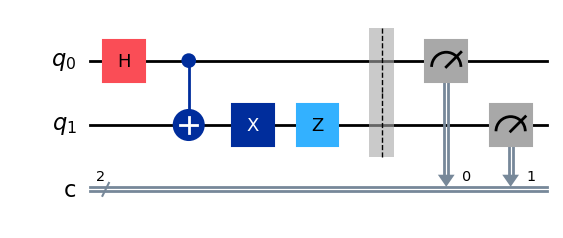

In [8]:
circuit = QuantumCircuit(2,2)
circuit.h(0)
circuit.cx(0,1)
circuit.x(1)
circuit.z(1)
circuit.barrier()
circuit.measure(0,0)
circuit.measure(1,1)
circuit.draw()

In [9]:
N_measure = 1024

{'10': 505, '01': 519}


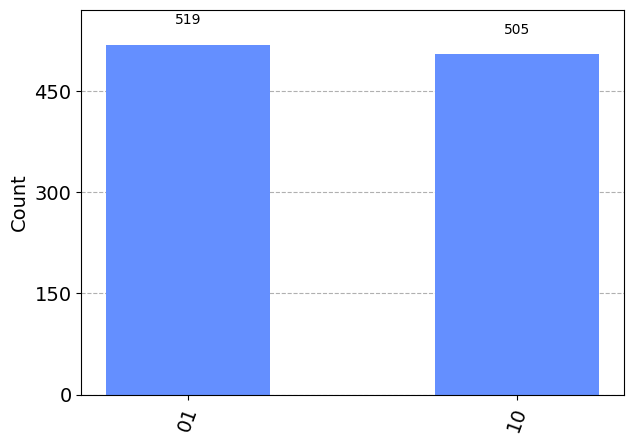

In [10]:
simulator = AerSimulator()
Nmeasure = N_measure #Amount of times the circuit is run
result = simulator.run(circuit, shots=Nmeasure).result() 
device_counts = result.get_counts() #Saves results as dictionary object
    #Simulation code

print(device_counts)
plot_histogram(device_counts)